# Used Cars EDA
### COMP 4447
### Ainsley McCutcheon & Ted Guevel

## Dataset and Motivation:

This analysis will explore many used cars across multiple websites to see if we can determine the best rating for selecting a used car. We would like to determine if specific used car websites have better inventory, have overlapping inventory, and/or have better prices when compared to other websites. We will scrape various used car websites to collect a number of features assocaited with their inventory of used cars, use feature engineering to process difficult and missing data, and graph trends and correlations of the data. 

## Task Definition and Research Question:

Are used car webistes biased towards certain Make, Mileage, and Prices of used cars? 
Can we generate a rating that we can consider "best" when buying a used car? 

We will input html code from used car websites and output our findings and generated rating for the collected car data. 

## Literature Review:

We belive our work is novel compared to the listings and ratings on specific used car websites because it offers an unbiased inventory (not website specific) and has an unbiased rating (not number of views specific or paid by owner). 

## Data Scraping:

In [2]:
#Import required packages/libraries:
from bs4 import BeautifulSoup as bsoup
from selenium import webdriver
import requests
import pandas as pd
import re
import ast
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import emoji

Below is are the urls for the various car website pages that have used cars in Denver (80225 zip code).

### Cars.com data scraping, parsing, and dataframe creation:
We will first parse the data from Cars.com and build a dataframe.

In [6]:
#100 Cars per page in Denver zip code 80225 (cars.com):
url_1 = "https://www.cars.com/shopping/results/?list_price_max=&makes[]=&maximum_distance=30&models[]=&page=1&page_size=100&stock_type=used&zip=80225"

In [7]:
#verify response:
response = requests.get(url_1)
print(response.status_code)

200


In [8]:
#generate bsoup:
html_soup = bsoup(response.text, 'html.parser')

In [81]:
#Response for Cars.com:
content_list = html_soup.find_all('div', attrs={'class': 'vehicle-card'})
#Used to sift through and find the div, span, h, etc. tags and names associated with our variables

print(content_list)

[<div class="vehicle-card inventory-result" data-listing-id="03974720-e54c-4f9b-9e59-7c8f4ee37387" data-override-payload='{"sponsored_type":"premier","vertical_position":1}' data-tracking-id="1" data-tracking-type="srp-vehicle-card" id="vehicle-card-03974720-e54c-4f9b-9e59-7c8f4ee37387-sponsored" phx-hook="VehicleCard" phx-target="6">
<a class="image-gallery-link vehicle-card-visited-tracking-link" href="/vehicledetail/03974720-e54c-4f9b-9e59-7c8f4ee37387/" rel="nofollow" tabindex="-1"></a>
<div class="vehicle-card-main js-gallery-click-card">
<div class="vehicle-card-photos js-gallery-click-gallery">
<cars-filmstrip totalcount="24">
<div class="gallery-wrap">
<div aria-label="Photo 1 of 24 of 2015 Ford Transit-250 Base" class="image-wrap" data-index="0">
<img alt="Photo 1 of 24 of 2015 Ford Transit-250 Base" class="vehicle-image" loading="lazy" src="https://platform.cstatic-images.com/large/in/v2/7aa60755-c731-5a41-a1f8-ddd21269eb53/ee6a4d2b-58bc-44ba-ba82-664b73dc2f83/AtfwcgacR3DNBgh

In [10]:
#Extract Name, Mileage, Price, and VIN from Cars.com Data:

names = []
for item in content_list:
    #names.append(item.find_all('h2', attrs={'class': "title"}))
    if item.find('h2') != None:
        names.append(item.find('h2').getText())
    else:
        names.append(0)
#print(names)

miles = []
for item in content_list:
    #miles.append(item.find_all('div', attrs={'class': "mileage"}))
    if item.find('div', attrs={'class': "mileage"}) != None:
        miles.append(item.find('div', attrs={'class': "mileage"}).getText())
    else:
        miles.append(0)
#print(miles)

price = []
for item in content_list:
    #price.append(item.find_all('span', attrs={'class': "primary-price"}))
    if item.find('span', attrs={'class': "primary-price"}) != None:
        price.append(item.find('span', attrs={'class': "primary-price"}).getText())
    else:
        price.append(0)
#print(price)

vin = []
#vin_html_list = html_soup.find_all('a', attrs={'class':'sds-button--secondary contact-by-phone'})
#for item in vin_html_list:
#    vin.append(re.search(r'data-vin="(\S+)" ',str(item))[1])
    
for item in content_list:
    if item.find('a', attrs={'class':'sds-button--secondary contact-by-phone'}) != None:
        vin.append(re.search(r'data-vin="(\S+)" ',str(item))[1])
    else:
        vin.append(None)

#^^ TG Updated VIN to incorporate left out VINS (also update all other values to adjust for 0 values)

In [11]:
#Combine Name, Mileage, and Prices into Dataframe:
data_cars = pd.DataFrame({"Name" : names, "Mileage" : miles, "Price" : price, "VIN" : vin})[["Name", "Mileage", "Price", "VIN"]]
data_cars

,Name,Mileage,Price,VIN
0,2015 Ford Transit-250 Base,"129,414 mi.","$25,387",1FTNR1ZM9FKA14323
1,2019 Audi Q8 3.0T Premium Plus,"56,693 mi.","$57,994",WA1BVAF10KD043890
2,2019 Mercedes-Benz GLS 450 Base 4MATIC,"20,872 mi.","$55,999",4JGDF6EE0KB228087
3,2022 Jaguar I-PACE EV400 HSE,"3,513 mi.","$76,625",SADHD2S1XN1618215
4,2020 Mercedes-Benz GLS 450 Base,"2,730 mi.","$78,998",4JGFF5KE2LA150619
...,...,...,...,...
96,1998 Chevrolet Corvette,"63,826 mi.","$17,995",1G1YY22G5W5130376
97,2012 Mercedes-Benz Sprinter 2500,"101,817 mi.","$28,995",WDZPE7CC4C5625071
98,2019 Mercedes-Benz AMG CLS 53 S-Model 4MATIC,"27,510 mi.","$68,598",WDD2J6BB7KA031739
99,2022 Jeep Wagoneer Series II,"2,637 mi.","$72,503",1C4SJVBT6NS144044


After building the dataframe, we convert the data for Mileage and Price into the correct datatype, and add a column to identify which website the data came from.

In [12]:
#Convert Mileage to number:
def mileage(row):
    return int(row.split(" mi.")[0].replace(',',''))

data_cars['Mileage'] = data_cars['Mileage'].apply(mileage)

#data
#data.dtypes

In [13]:
#Convert Price to Number:
def price(row):
    #print(row)
    if (row == 'Not Priced') | (row == 0):
        return 0
    else:
        return int(row.split("$")[1].replace(',', ''))

data_cars['Price'] = data_cars['Price'].apply(price)

#print(data)
#data.dtypes

In [14]:
#Add website column
data_cars['website'] = 'Cars.com'
data_cars

,Name,Mileage,Price,VIN,website
0,2015 Ford Transit-250 Base,129414,25387,1FTNR1ZM9FKA14323,Cars.com
1,2019 Audi Q8 3.0T Premium Plus,56693,57994,WA1BVAF10KD043890,Cars.com
2,2019 Mercedes-Benz GLS 450 Base 4MATIC,20872,55999,4JGDF6EE0KB228087,Cars.com
3,2022 Jaguar I-PACE EV400 HSE,3513,76625,SADHD2S1XN1618215,Cars.com
4,2020 Mercedes-Benz GLS 450 Base,2730,78998,4JGFF5KE2LA150619,Cars.com
...,...,...,...,...,...
96,1998 Chevrolet Corvette,63826,17995,1G1YY22G5W5130376,Cars.com
97,2012 Mercedes-Benz Sprinter 2500,101817,28995,WDZPE7CC4C5625071,Cars.com
98,2019 Mercedes-Benz AMG CLS 53 S-Model 4MATIC,27510,68598,WDD2J6BB7KA031739,Cars.com
99,2022 Jeep Wagoneer Series II,2637,72503,1C4SJVBT6NS144044,Cars.com


### Autotrader.com data scraping, parsing, and dataframe creation:

Similarly to the data from Cars.com, we parse and build a dataframe from data from Autotrader.com

In [15]:
#100 Cars per page in Denver zip code 80225 (Autotrader.com):
url_2 = "https://www.autotrader.com/cars-for-sale/all-cars/denver-co-80225?dma=&searchRadius=50&isNewSearch=false&marketExtension=include&showAccelerateBanner=false&sortBy=relevance&numRecords=100"

In [16]:
#verify response
response_autotrader = requests.get(url_2)
print(response_autotrader.status_code)

200


In [17]:
#create bsoup text
html_soup_autotrader = bsoup(response_autotrader.text, 'html.parser')

In [18]:
#Response for Autotrader.com:
content_list_autotrader = html_soup_autotrader.find_all('script', attrs={'data-cmp': 'lstgSchema'})
#print(content_list_autotrader[1])

In [19]:
print(content_list_autotrader[1])

<script data-cmp="lstgSchema" type="application/ld+json">{"@context":"http://schema.org/","@type":["Product","Car"],"vehicleIdentificationNumber":"1C4RJFBT9MC788523","name":"Used 2021 Jeep Grand Cherokee Limited X","mpn":"Used 2021 Jeep Grand Cherokee Limited X","image":"https://images.autotrader.com/hn/c/46166c13c4314b1c812063ec33787414.jpg","offers":{"@type":"Offer","priceCurrency":"USD","price":48999,"itemCondition":"http://schema.org/UsedCondition","availability":"http://schema.org/InStock","url":"https://www.autotrader.com/cars-for-sale/vehicledetails.xhtml?listingId=661609453","seller":{"@context":"http://schema.org/","@type":"AutoDealer","name":"Emich Chevrolet","telephone":"7203167098","address":{"@context":"http://schema.org/","@type":"PostalAddress","addressLocality":"Denver","addressRegion":"CO","postalCode":"80227","streetAddress":"2033 S Wadsworth Blvd"}}},"brand":{"@context":"http://schema.org/","@type":"Brand","name":{"code":"JEEP","name":"Jeep"}},"model":{"code":"JEEPGR

In [20]:
#Extract Name, Mileage, Price, and VIN from Autotrader.com Data:
#Data for Mileage and Price is already converted into integers in this step.

names = []
for item in content_list_autotrader:
    s = str(item)
    names.append(' '.join(s.split('name":"')[1].split('",')[0].split(' ')[1:]))
#print(names)

miles = []
for item in content_list_autotrader:
    s = str(item)
    s = s.split('value":"')[1].split('"}')[0].replace(',', '')
    if s == '':
        miles.append(0)
    else:
        miles.append(int(s))
        #miles.append(int(s.split('value":"')[1].split('"}')[0].replace(',', '')))
        #miles.append(s.split('value":"')[1].split('"}')[0].replace(',', ''))
#print(miles)

price = []
for item in content_list_autotrader:
    p = str(item)
    p = p.split('price":')[1].split(',')[0]
    if p =='':
        price.append(0)
    else:
        #price.append(int(s.split('price":')[1].split(',')[0]))
        price.append(int(p))
#print(price)

vin = []
for item in content_list_autotrader:
    vin.append(re.search(r'\"vehicleIdentificationNumber\":\"(\S+)\",',str(item))[1])

In [21]:
#Combine Name, Mileage, and Prices into Dataframe:
data_autotrader = pd.DataFrame({"Name" : names, "Mileage" : miles, "Price" : price, "VIN" : vin})[["Name", "Mileage", "Price", "VIN"]]
data_autotrader['website'] = 'Autotrader.com'
data_autotrader

,Name,Mileage,Price,VIN,website
0,2021 Audi Q3 2.0T Premium,18762,37990,WA1DECF3XM1028243,Autotrader.com
1,2021 Jeep Grand Cherokee Limited X,3736,48999,1C4RJFBT9MC788523,Autotrader.com
2,2020 Honda HR-V Sport,10058,26500,3CZRU6H18LM700016,Autotrader.com
3,2016 Scion iA,40979,12999,3MYDLBZVXGY112387,Autotrader.com
4,2019 Volkswagen Jetta S w/ Driver Assistance P...,13406,20999,3VWCB7BU2KM232547,Autotrader.com
...,...,...,...,...,...
98,2021 Volkswagen ID.4 Pro S,7920,46283,WVGTMPE22MP042070,Autotrader.com
99,2022 Volkswagen ID.4 Pro S,3915,51999,WVGGNPE25NP051412,Autotrader.com
100,2018 Volkswagen GTI SE,30364,27984,3VW547AU9JM252152,Autotrader.com
101,2018 Alfa Romeo Giulia Ti w/ Quick Order Packa...,12784,33147,ZARFAEEN0J7575920,Autotrader.com


### Carmax data pulling, data scraping, parsing, and dataframe creation:

Parsing and building a dataframe from the data on Carmax.com
Because Carmax.com uses dynamic html for it's search pages, we also had to use Selenium as well as BeautifulSoup.

In [22]:
#Pulling the html from carmax.com

url_3 = "https://www.carmax.com/cars/all?location=denver+co+80121"
#executable_path = '/mnt/c/users/ainsley/desktop/tools1/chromedriver.exe'
#response_3 = webdriver.Chrome(executable_path=executable_path)
response_3 = webdriver.Chrome()
response_3.get(url_3)

html_soup_3 = bsoup(response_3.page_source, 'html.parser')

content_list_3 = html_soup_3.find_all('article', attrs={'class': 'car-tile'})
print(content_list_3)

[<article aria-label="Select 2014 Jeep Patriot Sport with stock number 22706290" class="car-tile" data-clickprops="Element type: Car Tile,StockNumber: 22706290,YMM: 2014 Jeep Patriot,Price: 12998,Marked Down: null,Coming Soon: false" data-id="22706290" data-ignore-anchor-tag-rule="true" data-position="0" role="link" tabindex="0"><div aria-label="select car" class="tile-shell"><div class="car-tile--images"><div class="car-tile-heart"><button aria-label="Add favorite" type="button"></button></div><div class="image-carousel" data-clickprops="Element type: Car Tile Image,StockNumber: 22706290"><div class="image-carousel--viewer"><button aria-label="left arrow button" class="image-carousel--nav left-nav disabled" data-clickprops="Element type: Image Carousel Nav" data-direction="left" type="button"><svg aria-hidden="true" class="image-carousel--nav-arrow" focusable="false" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M15.41 16.09l-4.58-4.59 4.58-4.59L14 5.5l-6 6 6 6z"></p

In [23]:
#Building lists of the Make/Model/Year, Mileage, Price, and VIN from the html

names_3 = []
for item in content_list_3:
    names_3.append(item.find('span', attrs={'class': "year-make"}).text + ' ' 
                 + item.find('span', attrs={'class': "model-trim"}).text)
print(names_3)
miles_3 = []
for item in content_list_3:
    miles_3.append(item.find('span', attrs={'class': "miles"}).text.replace('K mi',',000'))
print(miles_3)

price_3 = []
for item in content_list_3:
    price_3.append(item.find('span', attrs={'class': "price"}).text.replace('*',''))
    
vin_3 = []
vin_html_list_carmax = html_soup_3.find_all('div', attrs={'class': "kmx-typography--body-1 vehicle-identifying-info"})
for item in vin_html_list_carmax:
    vin_3.append(re.search(r'<span>VIN # (\S+)</span>',str(item))[1])

['2014 Jeep Patriot Sport', '2014 Kia Soul ', '2014 Dodge Journey Limited', '2022 Honda Accord LX', '2014 Jeep Patriot Latitude', '2012 Hyundai Santa Fe GLS', '2018 Land Rover Discovery Sport HSE', '2018 BMW X1 SDrive28i', '2012 Kia Sorento EX', '2011 Mitsubishi Outlander SE', '2012 Ford Mustang GT', '2013 Dodge Journey SE', '2019 Jeep Wrangler Unlimited Sport', '2011 Jeep Grand Cherokee LAREDO', '2014 Mercedes-Benz C300 LUXURY', '2012 Subaru Forester 2.5X', '2019 Mercedes-Benz A220 ', '2018 Honda Civic LX', '2015 BMW 320 Series XI', '2011 Ford Fusion SE', '2014 Ford Escape Titanium', '2018 Mercedes-Benz C300 ']
['122,000', '96,000', '98,000', '7,000', '107,000', '111,000', '32,000', '41,000', '113,000', '119,000', '80,000', '78,000', '29,000', '127,000', '68,000', '123,000', '28,000', '47,000', '55,000', '45,000', '109,000', '33,000']


In [24]:
#combining the data into a dataframe
data_carmax = pd.DataFrame({"Name" : names_3, "Mileage" : miles_3, "Price" : price_3, "VIN" : vin_3})[["Name", "Mileage", "Price", "VIN"]]

In [25]:
#Convert Mileage and Price into integers
data_carmax.Mileage = data_carmax.Mileage.str.replace(',','').astype(int)

data_carmax.Price = data_carmax.Price.str.replace(',','')
data_carmax.Price = data_carmax.Price.str.replace('$','')

/var/folders/m8/b88jkb794xdfgr0f4b_4xqmh0000gn/T/ipykernel_78744/1430115406.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_carmax.Price = data_carmax.Price.str.replace('$','')


In [26]:
#adding webpage column
data_carmax['website'] = 'Carmax.com'
data_carmax.head(5)

,Name,Mileage,Price,VIN,website
0,2014 Jeep Patriot Sport,122000,12998,1C4NJPBAXED717748,Carmax.com
1,2014 Kia Soul,96000,13599,KNDJN2A28E7013322,Carmax.com
2,2014 Dodge Journey Limited,98000,15998,3C4PDDDG5ET166865,Carmax.com
3,2022 Honda Accord LX,7000,29998,1HGCV1F1XNA012969,Carmax.com
4,2014 Jeep Patriot Latitude,107000,14599,1C4NJPFA6ED849836,Carmax.com
5,2012 Hyundai Santa Fe GLS,111000,14998,5XYZGDAB6CG150316,Carmax.com
6,2018 Land Rover Discovery Sport HSE,32000,35998,SALCR2RX8JH768433,Carmax.com
7,2018 BMW X1 SDrive28i,41000,26998,WBXHU7C33J5H42151,Carmax.com
8,2012 Kia Sorento EX,113000,14998,5XYKUDA6XCG255759,Carmax.com
9,2011 Mitsubishi Outlander SE,119000,14998,JA4JT3AW2BU023575,Carmax.com


### Join the Cars.com, Autotrader.com, and Carmax.com dataframes:

Now we will join the data from all three websites. We will also do some feature engineering on the price column, check for duplicate VINs, and drop any extremely expensive cars. 

In [59]:
#Join website data:
data = pd.concat([data_cars, data_autotrader, data_carmax])
data

,Name,Mileage,Price,VIN,website
0,2015 Ford Transit-250 Base,129414,25387,1FTNR1ZM9FKA14323,Cars.com
1,2019 Audi Q8 3.0T Premium Plus,56693,57994,WA1BVAF10KD043890,Cars.com
2,2019 Mercedes-Benz GLS 450 Base 4MATIC,20872,55999,4JGDF6EE0KB228087,Cars.com
3,2022 Jaguar I-PACE EV400 HSE,3513,76625,SADHD2S1XN1618215,Cars.com
4,2020 Mercedes-Benz GLS 450 Base,2730,78998,4JGFF5KE2LA150619,Cars.com
...,...,...,...,...,...
17,2018 Honda Civic LX,47000,20998,19XFC2F51JE040869,Carmax.com
18,2015 BMW 320 Series XI,55000,23998,WBA3C3G51FNT52293,Carmax.com
19,2011 Ford Fusion SE,45000,14998,3FAHP0HA1BR321503,Carmax.com
20,2014 Ford Escape Titanium,109000,16998,1FMCU9JX0EUD08802,Carmax.com


In [1]:
#verifying datatypes
data.dtypes

NameError: name 'data' is not defined

In [61]:
#Check for null values
#data.isna().sum()

Since we are scraping multiple websites, we want to check whether or not we have duplicates in our dataset. Looking for duplicate VINs is the obvious solution here. 

In [62]:
#Check for duplicates:
duplicates = data[data['VIN'].duplicated()]
#duplicates = data.duplicated(subset='VIN')
duplicates

,Name,Mileage,Price,VIN,website
74,2014 Mercedes-Benz G 550,70943,66900,WDCYC3HF0EX218940,Autotrader.com


We find it very surprising that there are not more duplicates in our dataset (average <5 each time we run the code). This must mean that each dealer and individual that is trying to sell used cars is only selecting one used car website to sell through. Maybe there are high fees associated with listing on any given website, or contract requirements with the websites?

We will now remove all duplicates (if any), and drop rows that have no Make/Model/Year information for the car.

In [63]:
#removing duplicate car entries
data.drop_duplicates(subset=['VIN'], inplace = True)

#removing rows with no Make and Model
data.dropna(subset=['Name'], inplace = True)

We now split the Year, Make, and Model out of the Name column, creating a column for each (Year, Make, and Model respectively), and remove the Name column.
To get make sure the Make and Model split correctly (no strings that should be in the Make of the car in the Model or viceversa) we created a list of car Makes to check the Name column against.

In [64]:
#Pull Year and Make out of Name:

#Import list of popular makes from online:
makes = open("Car_Manufacturers.txt").read()

makes_str = '(' + makes.replace('\n','|') + ')'
data['Make'] = data['Name'].str.extract(r''+makes_str, re.IGNORECASE)

#Pull out year from name column:
year_regex = re.compile('^\d.[0-9]*', re.DOTALL)

def year(row):
    if re.findall(year_regex, row)==[]:
        return None
    else:
        return re.findall(year_regex, row)[0]

data['Year'] = data['Name'].apply(year)

def Model(df):
    if pd.isnull(df['Make']) != True:
        #return df['Name'].replace({df['Name']:{df['Make']:'', df['Year']:''}}) <-cant get multiple replace to work
        one = df['Name'].replace(df['Make'], '')
        if df['Year'] != None:
            return one.replace(df['Year'], '')

data['Model'] = data.apply(Model, axis=1)


#Drop Name column:
data.drop('Name', axis=1, inplace=True)

data


,Mileage,Price,VIN,website,Make,Year,Model
0,129414,25387,1FTNR1ZM9FKA14323,Cars.com,Ford,2015,Transit-250 Base
1,56693,57994,WA1BVAF10KD043890,Cars.com,Audi,2019,Q8 3.0T Premium Plus
2,20872,55999,4JGDF6EE0KB228087,Cars.com,Mercedes-Benz,2019,GLS 450 Base 4MATIC
3,3513,76625,SADHD2S1XN1618215,Cars.com,Jaguar,2022,I-PACE EV400 HSE
4,2730,78998,4JGFF5KE2LA150619,Cars.com,Mercedes-Benz,2020,GLS 450 Base
...,...,...,...,...,...,...,...
17,47000,20998,19XFC2F51JE040869,Carmax.com,Honda,2018,Civic LX
18,55000,23998,WBA3C3G51FNT52293,Carmax.com,BMW,2015,320 Series XI
19,45000,14998,3FAHP0HA1BR321503,Carmax.com,Ford,2011,Fusion SE
20,109000,16998,1FMCU9JX0EUD08802,Carmax.com,Ford,2014,Escape Titanium


In [65]:
#Checking the data for NaN values
data.isna().sum()
#data.Name.unique()

Mileage    0
Price      0
VIN        1
website    0
Make       2
Year       0
Model      2
dtype: int64

In [66]:
#Cleaning up the datatypes in the data dataframe
data.Year = data.Year.astype(int)
data.Price = data.Price.astype(int)
data.dtypes

Mileage     int64
Price       int64
VIN        object
website    object
Make       object
Year        int64
Model      object
dtype: object

Sometimes the websites don't list prices, and we set those to "0". Let's check for all price = 0 rows and impute the price based on the average price for that make. 

In [67]:
#Check to see if we have any 0 values for price (not always true):
(data['Price'] == 0).sum()

0

In [68]:
#Impute price based on average price for that make:

#Get Price mean for each Make:
mean = data.groupby('Make').mean('Price')


#Fill the 0 Price value with the mean price for it's respective Make:
def price_imputer(row):
    if row['Price']==0:
        return mean['Price'][row['Make']]
    else:
        return row['Price']

#Apply Funciton to df:
data['Price'] = data.apply(price_imputer, axis=1)
 
data


,Mileage,Price,VIN,website,Make,Year,Model
0,129414,25387,1FTNR1ZM9FKA14323,Cars.com,Ford,2015,Transit-250 Base
1,56693,57994,WA1BVAF10KD043890,Cars.com,Audi,2019,Q8 3.0T Premium Plus
2,20872,55999,4JGDF6EE0KB228087,Cars.com,Mercedes-Benz,2019,GLS 450 Base 4MATIC
3,3513,76625,SADHD2S1XN1618215,Cars.com,Jaguar,2022,I-PACE EV400 HSE
4,2730,78998,4JGFF5KE2LA150619,Cars.com,Mercedes-Benz,2020,GLS 450 Base
...,...,...,...,...,...,...,...
17,47000,20998,19XFC2F51JE040869,Carmax.com,Honda,2018,Civic LX
18,55000,23998,WBA3C3G51FNT52293,Carmax.com,BMW,2015,320 Series XI
19,45000,14998,3FAHP0HA1BR321503,Carmax.com,Ford,2011,Fusion SE
20,109000,16998,1FMCU9JX0EUD08802,Carmax.com,Ford,2014,Escape Titanium


Finally, we will drop all the cars with prices over $250,000. And we will drop any remaing null values to remove outliers from the data.

In [69]:
#Drop extremely high end vehicles:
data = data[data['Price']<=250000]

#Drop remaining null values (if any):
data = data.dropna(axis=0)

data.isna().sum()

Mileage    0
Price      0
VIN        0
website    0
Make       0
Year       0
Model      0
dtype: int64

Now we will make our own rating function as a funciton of average make price, year, and mileage.

In [70]:
#Generate a Rating Function:

#Compute average price for each make:
avg_make_price = data.Price.groupby(data.Make).mean()
avg_make_price_dict = avg_make_price.to_dict()

#Define Rating and assign it to Rating column:
data['Rating'] = ((data['Make'].map(avg_make_price_dict))**2)/data['Price']/(data['Mileage'])*(data['Year'].astype(int))


We used star emojis to convert the rating into a 1 to 5 star rating

In [71]:
#Add emoji Stars to bucket ratings 5 separate groups:
bin_title = [emoji.emojize(':star:'),emoji.emojize(':star::star:'),emoji.emojize(':star::star::star:'),
             emoji.emojize(':star::star::star::star:'),emoji.emojize(':star::star::star::star::star:')]

data['Star_Rating'] = pd.qcut(data['Rating'],q=5,labels=bin_title)
#data

In [72]:
#Reset index, since we have overlapping index values when we joined the dataframes:
data.reset_index(drop=True, inplace=True)
data

,Mileage,Price,VIN,website,Make,Year,Model,Rating,Star_Rating
0,129414,25387,1FTNR1ZM9FKA14323,Cars.com,Ford,2015,Transit-250 Base,754.040557,⭐
1,56693,57994,WA1BVAF10KD043890,Cars.com,Audi,2019,Q8 3.0T Premium Plus,2035.635133,⭐⭐
2,20872,55999,4JGDF6EE0KB228087,Cars.com,Mercedes-Benz,2019,GLS 450 Base 4MATIC,4921.371746,⭐⭐⭐⭐
3,3513,76625,SADHD2S1XN1618215,Cars.com,Jaguar,2022,I-PACE EV400 HSE,19014.473711,⭐⭐⭐⭐⭐
4,2730,78998,4JGFF5KE2LA150619,Cars.com,Mercedes-Benz,2020,GLS 450 Base,26684.975996,⭐⭐⭐⭐⭐
...,...,...,...,...,...,...,...,...,...
216,47000,20998,19XFC2F51JE040869,Carmax.com,Honda,2018,Civic LX,1733.247580,⭐⭐
217,55000,23998,WBA3C3G51FNT52293,Carmax.com,BMW,2015,320 Series XI,2850.584940,⭐⭐⭐
218,45000,14998,3FAHP0HA1BR321503,Carmax.com,Ford,2011,Fusion SE,3663.350783,⭐⭐⭐
219,109000,16998,1FMCU9JX0EUD08802,Carmax.com,Ford,2014,Escape Titanium,1336.433773,⭐


### Data Visualization and Comparison:

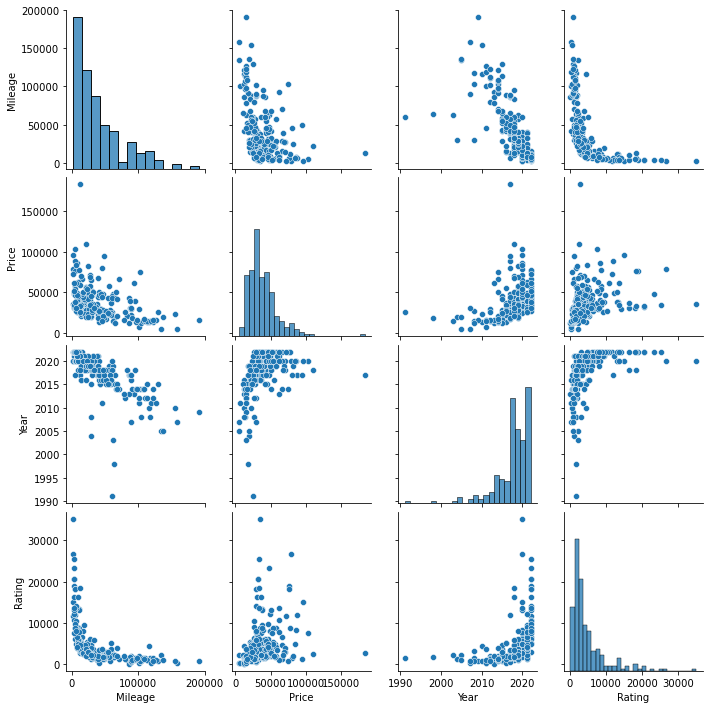

In [73]:
#Assess a pairplot of the numerical features:
sns.pairplot(data,x_vars=['Mileage', 'Price', 'Year', 'Rating'], y_vars=['Mileage', 'Price', 'Year', 'Rating'])

The Pairplot above shows some interesting trends. Our rating has a distribution that is skewed towards 0. This is becuse the newer cars with signifantally less milage then the rest tend to be high outliers in our rating function. Some obvious trends deal with Price. As price increases, mileage decreases, and as price increases, year increases. 

/Users/edwardguevel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/edwardguevel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


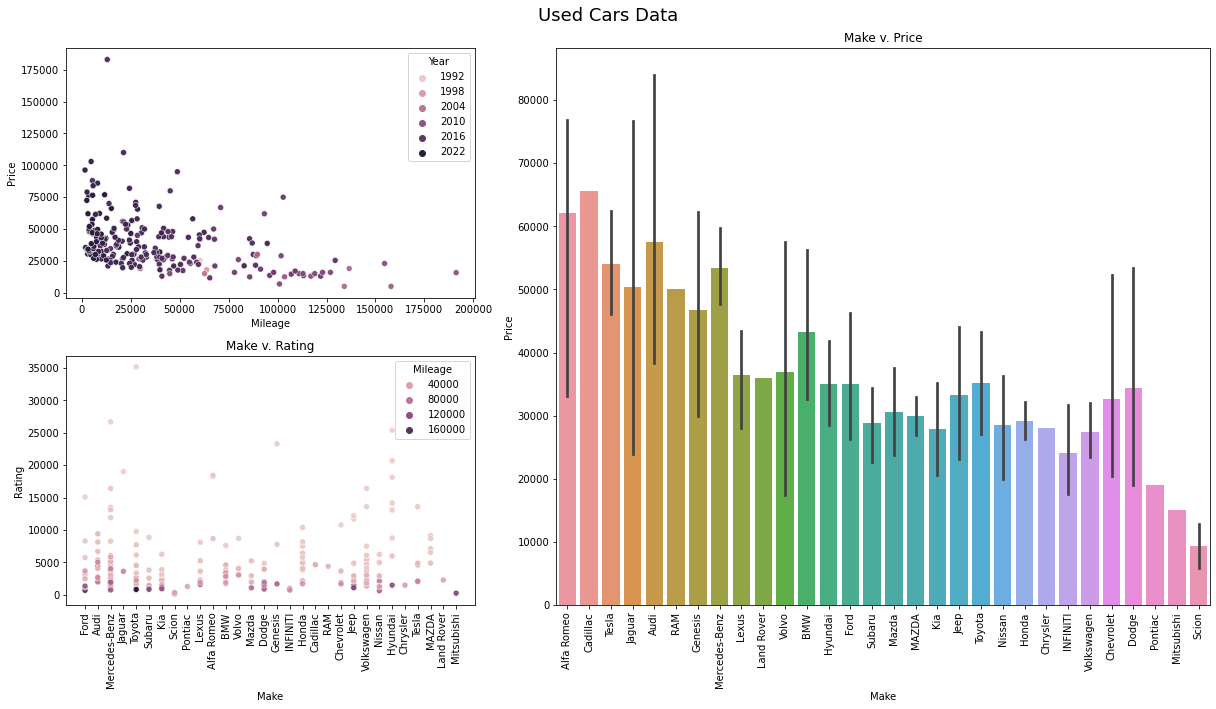

In [74]:
fig = plt.figure(figsize=(17, 10))

gs = fig.add_gridspec(4, 5)
ax0 = plt.subplot(gs[:2, :2])
ax1 = plt.subplot(gs[2:, :2])
ax2 = plt.subplot(gs[:4, 2:])

#Mileage v. Price:
sns.scatterplot(data['Mileage'], data['Price'], hue=data['Year'], ax=ax0)

              
#Plot Make v. Rating:
sns.scatterplot(data['Make'], data['Rating'], hue=data['Mileage'], ax=ax1)
plt.draw()
ax1.set_title('Make v. Rating')
ax1.set_xlabel('Make')
ax1.set_ylabel('Rating')
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=90)

#Sort data baed on Make:
result = data.groupby(["Make"])['Price'].aggregate(np.median).reset_index().sort_values('Price', ascending=False)

#Plot bar graph of price v. make:
sns.barplot(x='Make', y="Price", data=data, order=result['Make'], ax=ax2)
ax2.set_title('Make v. Price')
ax2.set_xlabel('Make')
ax2.set_ylabel('Price')
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=90)


fig.suptitle('Used Cars Data', fontsize=18)
plt.tight_layout()
plt.show()

In the Rating v. Make plot above, we can see that some Makes tend to have an average higher rating, and that all Makes have lower ratings for cars with more mileage. The Price v. Make bar plot show which car brands are more high-end and which brands are more affordable. The Mileage v. Price scatter plot shows that, generally, the price of a car tends to decrease as its mileage increases. 

/Users/edwardguevel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/edwardguevel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/edwardguevel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/edwardguevel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


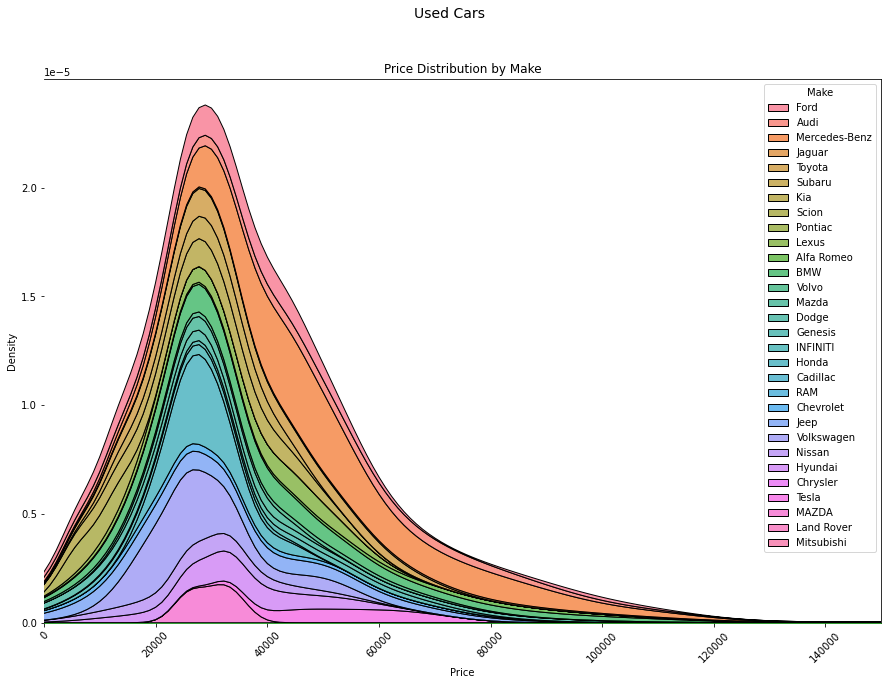

In [75]:
# histplot() is axes-level function
fig, ax = plt.subplots(figsize=(15, 10))
hist = sns.kdeplot(data=data, x='Price', hue='Make', multiple='stack', ax=ax)

# we can employ any of the pyplot axes methods on our Seaborn axes-level plots.
hist.set_title('Price Distribution by Make', fontsize=12)
plt.xticks(rotation=45)
hist.spines.left.set_visible(False)
hist.spines.bottom.set_color('green')
fig.suptitle('Used Cars', fontsize=14)
ax.set_xlim(0,150000)
plt.show()

The kde plot above gives us detailed information about each make, and what price range cars they tend to make. We can see that Mercedies Benz only makes higher end cars above 30,000 (and they keep their value since we are looking at used cars). Then Makes such as Volkswagen and Ram tend to only have used cars in the mid range of 15,000 - 35,000. Finally Makes such as Ford and BMW tend to offer used cars across the entire price spectrum. 

Now we will compare the specific websites we pulled from to see if any trends develop.

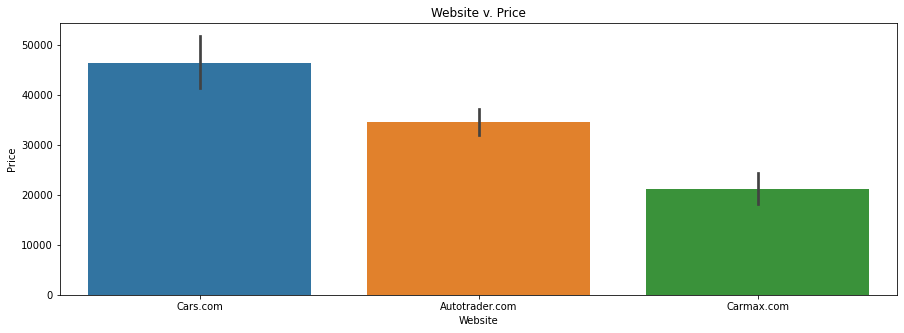

In [76]:
#Plot bar graph of Price v Website:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='website', y="Price", data=data)
ax.set_title('Price v. Website')
ax.set_xlabel('Website')
ax.set_ylabel('Price')
plt.show()

Looking at the plot of Price v. Website above we can clearly see that there is a descrepancy between sites. Carmax.com deals with a lot more lower end cars than Cars.com (highest end). The price differential between each website is about a $10,000 difference. 

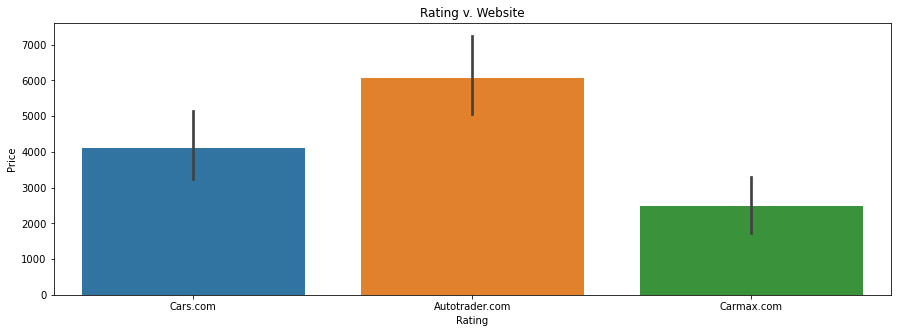

In [82]:
#Plot bar graph of Rating v Website:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='website', y="Rating", data=data)
ax.set_title('Rating v. Website')
ax.set_xlabel('Rating')
ax.set_ylabel('Price')
plt.show()

Even though Cars.com offers higher priced cars, Autotrader.com offers a much higher rating. This is likely due to the nature of our rating function, and the fact that we don't always consider a high price to be the best value. 

Finally, we will look at a correlation heatmap to visualize the relationships between each of the numerical features in our web-scraped data. 

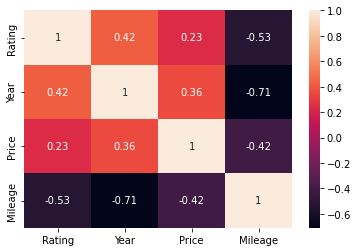

In [77]:
fig, ax = plt.subplots()
sns.heatmap(data[['Rating', 'Year', 'Price', 'Mileage']].corr(), annot=True, ax=ax)
plt.show()

Looking at the heatmap above, we can tell that Year and Mileage are very inversely correlated. This makes sense because cars tend to be driven year over year. Also, there is slight correlation between Price and Year, because most cars tend to loose value the older they get (but not always).

Also, the rating correlation to Year, Price, and Mileage is esentially as we would expect, since we did generate the rating based on these features. 

### Selecting the Best Cars Available:

In [78]:
#Best high end car (>$50,000)
high_end=data[data['Price']>=50000].copy()
data.iloc[high_end['Rating'].idxmax()]

Mileage                     2730
Price                      78998
VIN            4JGFF5KE2LA150619
website                 Cars.com
Make               Mercedes-Benz
Year                        2020
Model               GLS 450 Base
Rating              26684.975996
Star_Rating                ⭐⭐⭐⭐⭐
Name: 4, dtype: object

In [79]:
#Best medium range car ($20,000 to $50000)
high_end=data[(data['Price']>=20000)&(data['Price']<50000)].copy()
data.iloc[high_end['Rating'].idxmax()]

Mileage                     2000
Price                      35498
VIN            2T3P1RFVXLC131022
website           Autotrader.com
Make                      Toyota
Year                        2020
Model                   RAV4 XLE
Rating              35161.648789
Star_Rating                ⭐⭐⭐⭐⭐
Name: 108, dtype: object

In [80]:
#Best low end car (<$20,000)
high_end=data[data['Price']<20000].copy()
data.iloc[high_end['Rating'].idxmax()]

Mileage                          116976
Price                             12999
VIN                   WAUFGAFB3AN026128
website                        Cars.com
Make                               Audi
Year                               2010
Model            A6 3.0 Premium quattro
Rating                      4381.930339
Star_Rating                        ⭐⭐⭐⭐
Name: 22, dtype: object

Above are three different recommendations for the best rated used cars on the market out of the three websites we pulled data from. We have offered one selection for each price range. 

### Final Thoughts:



It was rewarding to generate an analysis that could scrape multiple websites for useful information when assesing where and how to purchase a used car. We found that many websites inventory does not overlap across multiple websites, so it is useful to browse numerous sites to find that perfect deal. Also, different websites tend to cater towards different price ranges of used vehicles. This project also allowed us to compare the different makes of vehicles. Some makes offer vehicles in all price ranges, while others tend to only offer cars in specific price ranges. 

Given more time, we would have liked to incorporate additional features to improve the overall accuracy or performance of our rating funciton. The websites we pulled from, and many other used car websites, have imbedded HTML code that makes it difficult to pull all of the features associated with a used car. Once we gain more pracitce with b4 syntax, regex, and HTML code, we will be able to update this analysis to incorporate more features. 